In [1]:
import pandas as pd
import numpy as np

DATA DESCRIPTION
```
file name -> Columns
quater-i.csv -> ['order_id', 'quantity', 'item_id', 'choice_description_id' 'item_price']
items.csv -> ['item_id', 'item_name']
```
Dataset Link - https://drive.google.com/drive/folders/1Z0kaFybvgFeczeUj4dldUnhTdloLqLsL?usp=share_link

In [2]:
# import like this
items_path = "data/items.csv"
q1_path = "data/quarter-1.csv"
q2_path = "data/quarter-2.csv"
q3_path = "data/quarter-3.csv"


q1 = pd.read_csv(q1_path)
q2 = pd.read_csv(q2_path)
q3 = pd.read_csv(q3_path)

items = pd.read_csv(items_path)

In [5]:
print(q1.info(), q2.info())
q3 # q3 is empty

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2275 entries, 0 to 2274
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   order_id               2275 non-null   int64 
 1   quantity               2275 non-null   int64 
 2   item_id                2275 non-null   int64 
 3   choice_description_id  2275 non-null   int64 
 4   item_price             2275 non-null   object
dtypes: int64(4), object(1)
memory usage: 89.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2347 entries, 0 to 2346
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   order_id               2347 non-null   int64 
 1   quantity               2347 non-null   int64 
 2   item_id                2347 non-null   int64 
 3   choice_description_id  2347 non-null   int64 
 4   item_price             2347 non-null   object
dtypes: int64(4), objec

,order_id,quantity,item_id,choice_description_id,item_price


### `Q:1-5`
1. You are given three quater files, your job is to append these three files and make a single dataframe.
2. Have a index as Q-1 Q-2 Q-3 for respective quater files in the dataframe
3. You're are given a file items.csv which has item_id and item_name. Find out most sold items in each quarter.
4. Find out items which has made most revenue in each quarter.
5. Find out avg order price of each quarter.

***Note: item_price is given as str with $ sign, in earlier task you have converted this to rupees, here too first convert item_price field in rupees.***

In [ ]:
# ques 1 and 2

# concatenating and creating quarter index, making multi-index
whole_year = pd.concat([q1, q2, q3], keys=['q1', 'q2', 'q3'])

# droping $ and making the price col float
whole_year['item_price'] = whole_year['item_price'].str.replace('$', '', regex=False).astype(dtype='float')

# dropping unnecessary index
whole_year = whole_year.droplevel(1)

# naming quarter index
whole_year.index.name = 'quarter'

whole_year.reset_index(inplace=True)

whole_year

,quarter,order_id,quantity,item_id,choice_description_id,item_price
0,q1,1,1,1,1,3.39
1,q1,1,1,2,2,3.39
2,q1,2,2,4,3,16.98
3,q1,4,1,7,6,9.25
4,q1,6,1,9,8,8.75
...,...,...,...,...,...,...
4617,q2,1829,1,23,92,11.25
4618,q2,1830,1,23,1043,11.25
4619,q2,1832,1,10,116,8.75
4620,q2,1832,1,8,0,4.45


In [ ]:
# ques 3
itemGrp_wy = whole_year.groupby(['quarter', 'item_id'])
itemGrp_wy_sum = itemGrp_wy.sum().sort_values(by='quantity', ascending=False).reset_index()
itemGrp_wy_sum

,quarter,item_id,order_id,quantity,choice_description_id,item_price
0,q2,4,377853,394,139450,3817.01
1,q1,4,336073,367,130352,3525.72
2,q2,11,260904,304,96773,2853.87
3,q1,11,236399,287,97472,2721.95
4,q1,8,227700,258,0,1120.93
...,...,...,...,...,...,...
90,q2,47,668,1,217,8.49
91,q1,49,1500,1,940,8.99
92,q2,37,279,1,279,7.40
93,q1,42,279,1,0,3.00


### Manual Approaches
Below are some of the manual approaches that I tried to do without knowing the concepts of merging or joining for filtering out the relevant data 😅️.

In [ ]:
most_sold_q1 = itemGrp_wy_sum[itemGrp_wy_sum.quarter == 'q1']['quantity'].max()
most_sold_q2 = itemGrp_wy_sum[itemGrp_wy_sum.quarter == 'q2']['quantity'].max()
itemGrp_wy_sum[(itemGrp_wy_sum.quantity == most_sold_q1) & (itemGrp_wy_sum.quarter == 'q1')]['item_id']

,quarter,item_id,order_id,quantity,choice_description_id,item_price
1,q1,4,336073,367,130352,3525.72


In [62]:
item_q1 = itemGrp_wy_sum[(itemGrp_wy_sum.quantity == most_sold_q1) & (itemGrp_wy_sum.quarter == 'q1')]['item_id'].item()
print("The most sold item in Quarter 1")
items[items['item_id'] == item_q1]

The most sold item in Quarter 1


,item_id,item_name
4,4,Chicken Bowl


In [39]:
itemGrp_wy_sum[(itemGrp_wy_sum.quantity == most_sold_q2) & (itemGrp_wy_sum.quarter == 'q2')]

,quarter,item_id,order_id,quantity,choice_description_id,item_price
0,q2,4,377853,394,139450,3817.01


In [61]:
item_q2 = itemGrp_wy_sum[(itemGrp_wy_sum.quantity == most_sold_q2) & (itemGrp_wy_sum.quarter == 'q2')]['item_id'].item()
print("The most sold item in Quarter 2")
items[items['item_id'] == item_q2]

The most sold item in Quarter 2


,item_id,item_name
4,4,Chicken Bowl


In [77]:
# ques 4
highest_rev_q1 = itemGrp_wy_sum[itemGrp_wy_sum['quarter'] == 'q1']['item_price'].max()
highest_rev_itemid_q1 = itemGrp_wy_sum[itemGrp_wy_sum['item_price'] == highest_rev_q1]['item_id'].item()
print(f"Following is the item with the highest revenue in Q1, with a revenue of $ {highest_rev_q1}")
items[items['item_id'] == highest_rev_itemid_q1]

Following is the item with the highest revenue in Q1, with a revenue of $ 3525.7200000000003


,item_id,item_name
4,4,Chicken Bowl


In [76]:
# ques 4
highest_rev_q2 = itemGrp_wy_sum[itemGrp_wy_sum['quarter'] == 'q2']['item_price'].max()
highest_rev_itemid_q2 = itemGrp_wy_sum[itemGrp_wy_sum['item_price'] == highest_rev_q2]['item_id'].item()
print(f"Following is the item with the highest revenue in Q2, with a revenue of $ {highest_rev_q2}")
items[items['item_id'] == highest_rev_itemid_q2]

Following is the item with the highest revenue in Q2, with a revenue of $ 3817.01


,item_id,item_name
4,4,Chicken Bowl


In [80]:
# ques 5
itemGrp_wy_sum.groupby('quarter')['item_price'].mean()

quarter
q1    351.795714
q2    375.264565
Name: item_price, dtype: float64

### Viable Approaches:

In [66]:
# ques 3
most_sold_id = whole_year.groupby(['quarter', 'item_id'])['quantity'].sum().reset_index(level='item_id').sort_values(by='quantity', ascending=False).head(2)
most_sold_items = most_sold_id.reset_index().merge(items, how='inner', on='item_id')
most_sold_items

,quarter,item_id,quantity,item_name
0,q2,4,394,Chicken Bowl
1,q1,4,367,Chicken Bowl


In [78]:
whole_year.head(2)

,quarter,order_id,quantity,item_id,choice_description_id,item_price
0,q1,1,1,1,1,3.39
1,q1,1,1,2,2,3.39


In [ ]:
# ques 4
whole_year.groupby(['quarter', 'item_id'])['item_price'].sum().reset_index(level=1).sort_values(by='item_price', ascending=False).head(2).reset_index().merge(items, on='item_id')

,quarter,item_id,item_price,item_name
0,q2,4,3817.01,Chicken Bowl
1,q1,4,3525.72,Chicken Bowl


In [95]:
# ques 5
whole_year.groupby('quarter')['item_price'].mean()

quarter
q1    7.577138
q2    7.354994
Name: item_price, dtype: float64

###`Q-6` From the IPL wala dataset you have to find the Purple cap holder each season.

*Note: Bowler with most no wickets in a season gets purple cap. If more than one bowler have same no of wickets in the season, one with least ecomnomy among them is purple cap holder.*

Bowler's Economy = runs-conceded per six balls

In [ ]:
# code here

###`Q-7:` Best bowler in death overs.
*Note: Have taken most no of wickets in case of tie with least economy*

Death Overs - [16-20]

In [ ]:
# code here

###`Q-8` Batsman record season wise

Make a function which takes a input `batsman_name` and it returns a dataframe.
Columns of the data frame are - `['Season','Innings', 'TotalRuns', 'Avg', 'HighestScore','StrikeRate']`.
* In result make `Season` column as index.

* Avg - total_runs/ no of time got out. - player_out column will help.
* StrikeRate -(total_runs/ balls faced) * 100- wides are not included in batsman ball faced counts. No balls are included. -> Extra_type column will help
* Batsman Can score runs on No Balls.
* Batsman can get out on No Ball or Wides. And even while being on non-striker. Keep these things in mind before masking.

In [ ]:
# code here

###`Q-9` Using both dataset, make a dataframe as described below

Data Frame columns-> `['PlayerOfThematch', 'BattingFigure', 'BowlingFigure']`

* BattingFigure->`<runs>/<balls>`
* BowlingFigure->`<wicket>/<runs-conceded>`

DataFrame should have one record for each match.

Say 'V Kohli' got POM award then in dataset include his batting figure of that match. Say he scored 112runs in 76 balls. And he hasn't bowled so Bowling Figure will be NaN
```
PlayerOfThematch BattingFigure BowlingFigure
V Kohli          112/76         nan  

```


In [ ]:
# code here

## **Questions Based on Iris Dataset**

- **Sepal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **SepalLengthCm:** Sepal length of flowers in cm
    - **SepalWidthCm:** Sepal width of flowers in cm

- **Petal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **PetalLengthCm:** Petal length of flowers in cm
    - **PetalWidthCm:** Petal width of flowers in cm

- **Iris Virginica:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Versicolor:** https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Setosa:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv
    - **Unnamed 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

In [2]:
import pandas as pd
sepal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv")
petal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv")

virginica = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv")
versicolor = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv")
setosa = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv")


In [8]:
sepal_all.head(2)

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm
0,0,1,5.1,3.5
1,1,2,4.9,3.0


In [9]:
petal_all.head(2)

,Unnamed: 0,Id,PetalLengthCm,PetalWidthCm
0,0,1,1.4,0.2
1,1,2,1.4,0.2


In [15]:
virginica.head(2)

,Unnamed: 0,Id,Species
0,100,101,Iris-virginica
1,101,102,Iris-virginica


In [16]:
versicolor.head(2)

,Unnamed: 0,Id,Species
0,50,51,Iris-versicolor
1,51,52,Iris-versicolor


In [22]:
setosa.head(2)

,Unnamed: 0,Id,Species
0,0,1,Iris-setosa
1,1,2,Iris-setosa


### `Q-9:` Plot a bar chart of the average Sepal Length  of Virginica and average Petal length of Setosa flower.

<Axes: xlabel='Id'>

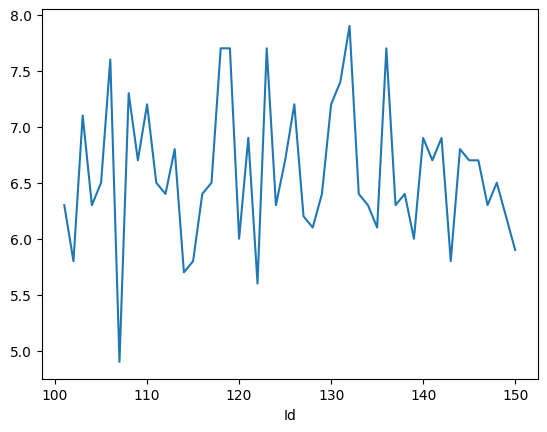

In [34]:
sepal_all.merge(virginica, on='Id').groupby('Id')['SepalLengthCm'].mean().plot()

<Axes: xlabel='Id'>

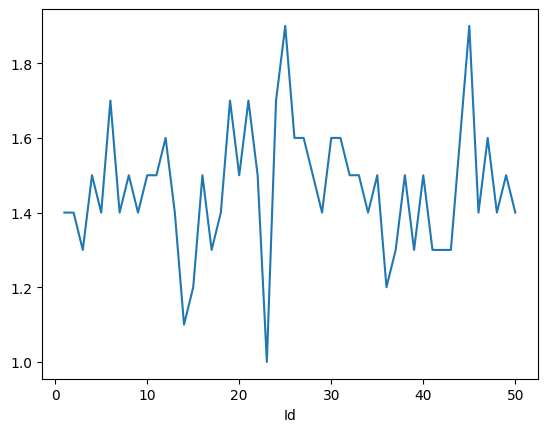

In [31]:
petal_all.merge(setosa, on='Id').groupby('Id')['PetalLengthCm'].mean().plot(kind='line')

### `Q-10:` Create the complete dataset by using the below datasets:
- virginica
- versicolor
- setosa
- sepal all
- petal all

This dataset should have these below column names in order:
1. Id
2. Species
3. SepalLengthCm
4. SepalWidthCm
5. PetalLengthCm
6. PetalWidthCm

Also, the dataset should be shuffled means the `Id` column should not be in increasing or decreasing order. So, make a dataset which has the shuffled Id column. You can use `DataFrame.sample()` method to shuffle.

In [ ]:
.merge(virginica.drop('Unnamed: 0', axis=1), on='Id')
.merge(versicolor.drop('Unnamed: 0', axis=1), how='left', on='Id')

In [65]:
flowers = sepal_all.merge(petal_all.drop('Unnamed: 0', axis=1), how='outer', on='Id').merge(versicolor.drop('Unnamed: 0', axis=1), how='left', on='Id').merge(virginica.drop('Unnamed: 0', axis=1), how='left', on='Id').merge(setosa.drop('Unnamed: 0', axis=1), how='left', on='Id')
flowers.sample(2)

,Unnamed: 0,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_x,Species_y,Species
59,59,60,5.2,2.7,3.9,1.4,Iris-versicolor,NaN,NaN
44,44,45,5.1,3.8,1.9,0.4,NaN,NaN,Iris-setosa


In [ ]:
flowers['Species'] = flowers[['Species_x', 'Species_y', 'Species']].bfill(axis=1).iloc[:, 0]
flowers = flowers.drop(['Species_x', 'Species_y'], axis=1)

In [89]:
flowers = flowers.sample(frac=1, random_state=42).reset_index(drop=True).drop('Unnamed: 0', axis=1)
flowers

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,113,6.8,3.0,5.5,2.1,Iris-virginica
1,150,5.9,3.0,5.1,1.8,Iris-virginica
2,20,5.1,3.8,1.5,0.3,Iris-setosa
3,24,5.1,3.3,1.7,0.5,Iris-setosa
4,6,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...,...
145,53,6.9,3.1,4.9,1.5,Iris-versicolor
146,100,5.7,2.8,4.1,1.3,Iris-versicolor
147,149,6.2,3.4,5.4,2.3,Iris-virginica
148,16,5.7,4.4,1.5,0.4,Iris-setosa


In [93]:
flowers.columns[-1]

'Species'

In [ ]:
last_col = flowers['Species']
flowers = flowers.drop('Species', axis=1)
flowers.insert(1, 'Species', last_col)

In [96]:
flowers

,Id,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,113,Iris-virginica,6.8,3.0,5.5,2.1
1,150,Iris-virginica,5.9,3.0,5.1,1.8
2,20,Iris-setosa,5.1,3.8,1.5,0.3
3,24,Iris-setosa,5.1,3.3,1.7,0.5
4,6,Iris-setosa,5.4,3.9,1.7,0.4
...,...,...,...,...,...,...
145,53,Iris-versicolor,6.9,3.1,4.9,1.5
146,100,Iris-versicolor,5.7,2.8,4.1,1.3
147,149,Iris-virginica,6.2,3.4,5.4,2.3
148,16,Iris-setosa,5.7,4.4,1.5,0.4


### `Q-11:` Find out the maximum and minimum sepal width and petal width of Setosa and Versicolor. To do this:
- First create a dataset by merging the required datasets
- After that, use `groupby` to create groups based on the "Species" column.
- Then find out which are asked in this question.


The output should be like this:
```bash
Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4

**************************************************

Minimum Sepal width of Versicolor is 2.0
Maximum Sepal width of Versicolor is 3.4

**************************************************
```

In [ ]:
flowers.groupby()

In [151]:
flowers_grp = flowers.groupby('Species')[['SepalWidthCm', 'PetalWidthCm']]
flowers_min = flowers_grp.min().reset_index()
flowers_min

,Species,SepalWidthCm,PetalWidthCm
0,Iris-setosa,2.3,0.1
1,Iris-versicolor,2.0,1.0
2,Iris-virginica,2.2,1.4


In [152]:
flowers_min['Species'] = flowers_min['Species'].replace({
    'Iris-setosa': 'Setosa',
    'Iris-versicolor': 'Versicolor',
    'Iris-virginica': 'Virginica'
})
flowers_min

,Species,SepalWidthCm,PetalWidthCm
0,Setosa,2.3,0.1
1,Versicolor,2.0,1.0
2,Virginica,2.2,1.4


In [ ]:
for index, row in flowers_min.iterrows():
    print(f"Minimum Sepal Width of Setosa is")

Setosa break
Versicolor break
Virginica break


In [134]:
flowers_max = flowers_grp.max().reset_index()
flowers_max

,Species,SepalWidthCm,PetalWidthCm
0,Iris-setosa,4.4,0.6
1,Iris-versicolor,3.4,1.8
2,Iris-virginica,3.8,2.5


In [139]:
flowers_max['Species'] = flowers_max['Species'].replace({
    'Iris-setosa': 'Setosa',
    'Iris-versicolor': 'Versicolor',
    'Iris-virginica': 'Virginica'
})
flowers_max

,Species,SepalWidthCm,PetalWidthCm
0,Setosa,4.4,0.6
1,Versicolor,3.4,1.8
2,Virginica,3.8,2.5


In [164]:
dim_list = [flowers_min.SepalWidthCm[0], flowers_max.SepalWidthCm[0], flowers_min.SepalWidthCm[1], flowers_max.SepalWidthCm[1]]
for i in dim_list:
    print(f"Minimum Sepal Width of Setosa is {i}")

# print(f"Minimum Sepal Width of Setosa is {flowers_min.SepalWidthCm[0]}")
# print(f"Minimum Sepal Width of Setosa is {flowers_max.SepalWidthCm[0]}")
# print(f"Minimum Sepal Width of Setosa is {flowers_min.SepalWidthCm[0]}")
# print(f"Minimum Sepal Width of Setosa is {flowers_min.SepalWidthCm[0]}")

Minimum Sepal Width of Setosa is 2.3
Minimum Sepal Width of Setosa is 4.4
Minimum Sepal Width of Setosa is 2.0
Minimum Sepal Width of Setosa is 3.4
